> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::


# Algoritmos de oráculo

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $



In [6]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ

## Introducción

La potencial de la computación cuántica reside en que podamos fabricar estados que concentran la solución a un problema en una o varias amplitudes. 


El foco se desplaza enconces a una especie de ingeniería inversa: encontrar los *problemas adecuados*

Un clase importante de problemas consiste en  *desvelar* alguna propiedad de una cierta función binaria. La única opción válida para dicho propósito es consultar dicha función tantas veces como sea necesario. Por lo demás, se trata de una *caja negra*. Por esta razón, a dichas funciones se les denomina *oráculos*

Los ingredientes que nos ofrece la computación cuántica para tratar de obtener una ventaja computacional son :
    
- paralelismo ($\to $ evaluar el oráculo en **todos** los elementos de la base simultáneamente)

- codificación del oráculo en **la fase** (retroceso de fase)

- interferencia para **concentrar** la información en algunas amplitudes.


En este capítulo vamos a analizar una clase de circuitos que admite una variedad de problemas de interrogación de oráculo. Aunque el tipo de problemas que podemos atacar no es muy relevante, nos servirá para ilustrar el mecanismo básico de cálculo que ocurre en los circuitos cuánticos. 



## Circuito General

Denotaremos el conjunto $S_n =\{0,1,...2^n-1 \}\sim \{0,1\}^n$ en forma decimal o binaria ($n-$bits) indistintamente.
Ya hemos visto cómo la implementación de una función binaria  $f:S_n \to S_1$ se realiza en forma de un operador unitario  controlado 

$$
{U_f} : \ket{x}_n\otimes \ket{y} \to \ket{x}_n\otimes \ket{y + f(x)}
$$

En particular, si $\ket{y} = \ket{-}$ tendremos el oráculo $f(x)$ codificado en la fase.

Vamos a estudiar el siguiente circuito



::::{figure} ./figuras/Busqueda_Oraculo.png
:width: 500px
:align: center
::::


Para evaluar la acción de este circuito vamos a recordar la forma en la que actúa el operador de Walsh-Hadamard, $W_n = \Hil^{\otimes n}$,  sobre un estado cualquiera de la base $\ket{x}_n$

$$
W_n \ket{x}_n = \sum_{y} (-1)^{xy}\ket{y}_n
$$

Evaluemos explícitamente el estado a la salida, antes de medir

\begin{eqnarray*}
 \ket{0}_n \otimes \ket{-} 
&\stackrel{H^{\otimes n}}{\longrightarrow} & \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1}\ket{x}\otimes \ket{-} ~~~~\hbox{ paralelismo}  \nonumber \\
\rule{0mm}{12mm}
&\stackrel{U_f}{\longrightarrow} &  \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1}\ket{x}\otimes (-1)^{f(x)} \ket{-} ~~~~ \hbox{ codificación del oráculo  en la fase}\\
\rule{0mm}{12mm}
&\stackrel{H^{\otimes n}}{\longrightarrow} &   \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1}(-1)^{f(x)}(H^{\otimes n}\ket{x})\otimes  \ket{-}   \nonumber\\
\rule{0mm}{12mm}
&=&   \frac{1}{2^n} \sum_{x,y=0}^{2^n-1}(-1)^{f(x)+ x \cdot y}\ket{y}\otimes \ket{-}   ~~~~ \hbox{interferencia } 
\end{eqnarray*}

donde
$$x\cdot y ~\equiv~ x_{n-1}y_{n-1} \oplus x_{n-2}y_{n-2} \oplus ...  \oplus x_{0}y_{0}$$ 


El resultado final es un estado factorizado. Por tanto podemos medir el primer factor de forma independiente y olvidarnos del segundo

$$
\ket{\Phi} =  \frac{1}{2^n} \sum_{x,y=0}^{2^n-1}(-1)^{f(x)+ x \cdot y}\ket{y} \, 
$$

::::::{admonition} En resumen
:class: attention


Hemos construido un cierto estado que sólo depende de la función $f(x)$. Ahora es cuando hay que hacer ingenieria inversa: dependiendo de cómo sea $f(x)$ podremos conseguir interferencias que <i>concentren la probabilidad</i> en algún estado concreto que delate a $f$. 
::::::


###  El problema de Deutsch-Josza 

 

- **Promesa**: $f$ pertenece a una de las dos clases siguientes:  *constante* ($C \Rightarrow f(x)$ igual para todo $x$) o *equilibrada* ($E\Rightarrow f(x)$ igual para la mitad)



- **Problema**: descubrir si $f$ es de clase  $C$ ó $E$



::::::{admonition} Notar
:class: note


Clásicamente: deberíamos invocar el oráculos  $2^n/2+1$ veces. Esto es, por lo menos hasta la mitad de valores posibles de entrada, más uno.   
Con esta chorrada de problema, que no vale para nada, fue uno de los primeros ejemplos de ventaja cuántica, con el que se inició en 1992 la andadura hacia la computación cuántica algorítmica.  
::::::


-  **Solución**: corremos el circuito una vez y medimos sobre el estado $~\ket{\Phi}$ 



$\to ~$ si $f \in C$  es <b>constante</b>  $~\Rightarrow~ f(x) = f_0 ~\forall x ~~~\Rightarrow~~~$ la probabilidad de obtener $ \ket{0^n}~$ es  $ 1$  
 
\begin{eqnarray*}
p_{0} &=& |\braket{0^n}{\Phi}|^2 \nonumber\\ \rule{0mm}{10mm}
&=& \left\vert \bra{0^n} \sum_{y=0}^{2^n-1}\left( \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f_0 + x \cdot y} \right)\ket{y} \right\vert^2
 \nonumber\\ \rule{0mm}{10mm}
 &=& \left\vert \frac{(-1)^{f_0}}{2^{n}}   \sum_{x=0}^{2^n-1} (-1)^{x \cdot 0}\right\vert^2    \\ \rule{0mm}{8mm}
 &=& (-1)^{2f_0} \\ \rule{0mm}{8mm} &=& 1 
\nonumber 
\end{eqnarray*}






$\to ~ $    si $f\in E$ es <b>equilibrada</b> $~\Rightarrow~$ la probabilidad de obtener $~\ket{0^n}~$  es $~0~$


En este caso  $f(x)=\pm 1$ está distribuida de forma equilibrada $~\Rightarrow$


\begin{eqnarray*}
\braket{0^n}{\Phi} &=& \bra{0^n} \sum_{y=0}^{2^n-1}\left( \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x) + x \cdot y} \right)\ket{y} \nonumber\\ \rule{0mm}{12mm}
 &=&  \frac{1}{2^{n}} \sum_{x=0}^{2^n-1} (-1)^{f(x) + x \cdot 0}    = 0
\nonumber \\ \rule{0mm}{12mm}
 &=&  \frac{1}{2^{n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)}    = 0
\end{eqnarray*}

al haber, por hipótesis, igual número de valores $f(x)=0$ que de $f(x)=1$ en la suma.



::::::{admonition} Ejercicio
:class: tip

    
Oráculos constantes sólo hay dos, $f(x)=0~$ ó $~f(x) = 1$ para todo $x$. Oráculos equilibrados hay muchos, y en la lección anterior deberías haber fabricado un circuito para generarlos. 
Construye el circuito de Deutsch-Josza y ponlo a prueba con estos oráculos. 
::::::


### El problema de Bernstein-Vazirani   



-  **Promesa**: $f$ es una *función lineal*, definida por una cadena de bits $a \in \{0,1\}^n$

$$f(x) = a\cdot x  = a_{n-1} x_{n-1} \oplus ....\oplus a_0 x_0$$


- **Problema**: hallar $a = a_{n-1} \ldots a_0$ 


::::::{admonition} Nota
:class: note

    
Clásicamente necesitaríamos invocar el oráculo   $n$ veces. 
Por ejemplo  $f(0\cdots 0 1)=0,1 $ revela $a_0=0,1$ respectivamente.
Iterativamente  $f(0\cdots 0 1 0)\to a_1$, $ f(0\cdots 1 0 0)\to a_2 \cdots$, etc.
::::::


**Solución**: correr el circuito *una sóla vez* y medir el estado final

\begin{eqnarray}
\ket{\Phi} &=& \frac{1}{2^n} \sum_{x,y=0}^{2^n-1}(-1)^{f(x)+ y \cdot x}\ket{y}
=  
\frac{1}{2^n}\sum_{y=0}^{2^n-1} \left(\sum_{x=0}^{2^n-1}(-1)^{(a+y)\cdot x}\right)\ket{y} ~\nonumber\\  \rule{0mm}{10mm}
&=&  
\frac{1}{2^n}\sum_{y=0}^{2^n-1} \left(\sum_{x=0}^{2^n-1}(-1)^{(-a+y)\cdot x}\right)\ket{y}\nonumber\\ \rule{0mm}{10mm}
 &=&  \frac{1}{2^n} \sum_{y=0}^{2^n-1} 2^n \delta_{(-a+y),0} \ket{y} \nonumber\\ \rule{0mm}{8mm}
&=& \rule{0mm}{5mm} \ket{a_0a_1\cdots a_{n-1}} \nonumber 
\end{eqnarray}

¡ Una **única**  medida del estado final da $a$ !

Ahora, igual que en el caso anterior,  la <i>clave</i> está en <i>concentrar</i> la  probabilidad de la solución en la amplitud de **un sólo estado**.     
Esa tarea de concentración que implica la suma de fases no se realiza explícitamente más que si queremos emular el circuito cuántico mediante un computador clásico. En un computador cuántico, esa concentración *simplemente ocurre*



¡Vamos a programar!

Para poner a prueba el algorito de Bernstein Vazirani, debemos generar un oráculo lineal $f(x)=x\cdot a$ con una cadena $a=(a_{n-1},\ldots a_0)$ de longitud $n$  ¡que esté *oculta*!

In [61]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

def random_linear_oracle(n):  #n es la longitud de la cadena a oculta

    import random, string
    a = ''.join(random.choices(['0','1'], k=n))
    print('cadena oculta=',a)  
    qc = QuantumCircuit(n+1) # el ultimo registro es la salida |f(x)> = |a.x>

    
    for i, ai in enumerate(reversed(a)):  # ponemos reversed para usar el convenio de qiskit
        if ai == '1':
            qc.cx(i,n)    
    return qc

random_linear_oracle(4).draw()
    

cadena oculta= 0110


q_0: ──────────
               
q_1: ──■───────
       │       
q_2: ──┼────■──
       │    │  
q_3: ──┼────┼──
     ┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├
     └───┘└───┘

Ahora implementamos el oráculo en el algoritmo de BV 

In [62]:
def BV_circuit(linear_oracle):
    n = linear_oracle.num_qubits - 1
    qreg = QuantumRegister(n+1)
    creg = ClassicalRegister(n)
    qc = QuantumCircuit(qreg,creg)

    'generamos máxima superposición'
    qc.h(qreg)

    'Ponemos el último qubit en el estado |->'
    qc.z(qreg[-1])
     
    'añadimos el oráculo lineal con la cadena oculta'
    qc.append(linear_oracle.to_gate(),qreg[:])   
 
    'generamos interferencias'
    qc.h(qreg[0:-1])

    'medimos'
    qc.measure(qreg[0:-1],creg)
    return qc

vamos a correr un ejemplo concreto 

cadena oculta= 0100


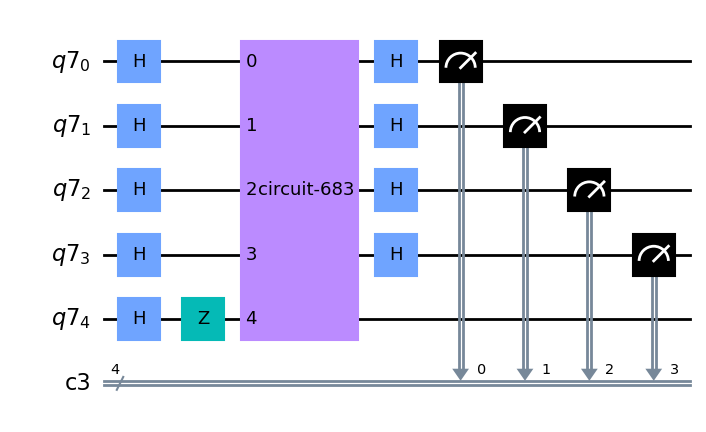

In [63]:
n = 4
linear_oracle = random_linear_oracle(n)
BV_qc = BV_circuit(linear_oracle)

BV_qc.draw(output = 'mpl')

ahora podemos extraer la cadena $a$ en *una sóla invocación* del oráculo

In [15]:
from qiskit.primitives import Sampler
shots = 1
dist = Sampler().run(BV_qc,shots=shots).result().quasi_dists[0]

tQ.dist2counts(dist,n,shots)

{'1110': 1}

::::::{admonition} Nota
:class: note



<i>¿Por qué funciona el algoritmo de Bernstein Vazirani?</i>

Supongamos que $a = 01011$ y que el oráculo que implementa la función lineal es 

  
    
::::{figure} ./figuras/BV_circuit.png
:width: 300px
:align: center
::::

    
Insertando dicho oráculo en el algoritmo de búsqueda, y 

    
-  recordando que $\ket{-} = H \ket{1}$ 

-  usando la equivalencia de circuitos 


es fácil reconocer que es equivalente al siguiente

::::{figure} ./figuras/Bernstein_Vazirani_trick.png
:width: 250px
:align: center
::::
    
::::::


Los anteriores algoritmos son *deterministas*. Vamos a ver un algoritmo que proporciona una ventaja exponencial pero de manera *probabilista*

## El problema de Simon  


Consideremos *ahora* una función $f:\{0,1\}^n \to \{0,1\}^n$ con la siguiente propiedad

-  **Promesa** : $f$ es *doblemente valuada y periódica* bajo suma *bit a bit*.  Es decir, existe un $~s\in \{0,1\}^n ~$ tal que $~~\forall x \in \{0,1\}^n $

$$
 f(x) = f(x\oplus s) ~~~~~
$$



-  **Problema**: hallar $s$ con el mínimo número de consultas al oráculo

::::::{admonition} Ejemplo
:class: tip


$$
\begin{array}{cc|cc}
\hline x & f(x) & x & f(x) \\ \hline
0000&1111& 1000&0101\\
0001&1011& 1001&0100\\
0010&0011& 1010&0000\\
0011&1000& 1011&1110\\
0100&0101& 1100&1111\\
0101&0100& 1101&1011\\
0110&0000& 1110&0011\\
0111&1110& 1111&1000\\
\hline 
\end{array}
$$

Claramente, por inspección en este caso $s = 1100$. En un caso general, necesitaríamos inspeccionar ${\cal O}(n 2^n)$ términos. Se trata por tanto de un problema con complejidad exponencial.
::::::

- **Solución**: 

El circuito es *el mismo*, pero ahora involucra $n$ cúbits para codificar la *imagen* de $f$  



::::{figure} ./figuras/SimonCircuit0.png
:width: 500px
:align: center
::::

Notar la diferencia con los casos anteriores: 

-   ahora en la entrada de la ancilla ponemos $\ket{0}_n ~~\Rightarrow$ como consecuencia el oráculo aplica $f(x)$ de forma *booleana*


$$
U_f \sum_{x=0}^{2^n-1}\ket{x}\otimes \ket{0}  = \sum_{x=0}^{2^n-1}\ket{x}\otimes \ket{f(x)}
$$

-  después de aplicar e oráculo el estado está entrelazado!
$~\Rightarrow ~$ si hacemos una medida del segundo registro 
  el  n-cúbit en segundo registro colapsará a un cierto estado 
$~\ket{f(x_0)} $


- en virtud de la *promesa* $\ket{f(x_0)} = \ket{f(x_0\oplus s)}$, el primer registro colapsará a una *superposición de dos estados*  

$$
 \frac{1}{\sqrt{2}} \left( \rule{0mm}{4mm} \ket{x_0} + \ket{x_0 \oplus s} \right)
$$


- siguiendo el circuito, aplicamos de nuevo la puerta de Walsh-Hadamard. El estado final en el primer registro será 
el siguiente

\begin{eqnarray*}
\ket{\psi} &=& H^{\otimes n} \frac{1}{\sqrt{2}} \left( \rule{0mm}{4mm} \ket{x_0} + \ket{x_0 \oplus s} \right) \\
&=& \frac{1}{\sqrt{2^{n+1}}} \sum_{y=0}^{2^n-1} \left[ (-1)^{x_0\cdot y} + (-1)^{(x_0\oplus s) \cdot y}\right]  \ket{y} \nonumber\\ \rule{0mm}{10mm}
&=& \frac{1}{\sqrt{2^{n+1}}} \sum_{y=0}^{2^n-1} \left[ (-1)^{x_0\cdot y} + (-1)^{x_0 \cdot y}(-1)^{ s \cdot y}\right]  \ket{y} \nonumber\\ \rule{0mm}{10mm}
&=&  \frac{1}{\sqrt{2^{n+1}}} \sum_{y=0}^{2^n-1}(-1)^{x_0\cdot y}  \left( \rule{0mm}{6mm} 1+ (-1)^{s \cdot y}\right) \ket{y}
\end{eqnarray*}

Observemos  el factor 

$$
\frac{1}{2}\left( \rule{0mm}{3mm} 1+ (-1)^{s \cdot y}\right)~~ = ~~ 
\left\{\begin{array}{ccc} 0 &\hbox{if}&  s \cdot y\, (\hbox{mod 2}) = 1 \\ 1 &\hbox{if} & s\cdot y\, (\hbox{mod 2}) = 0\end{array}
\right.
$$ 


Se trata de un proyector que hace que, al medir $\ket{\psi}$ **sólo tengan amplitud no nula** aquellos  $\ket{y}$ con $s\cdot y\,  (\hbox{mod 2})= 0$



Por tanto, una medida repetida $p$ veces en el primer registro producirá una serie de n-bits $ y^{(a)} = y^{(1)},y^{(2)},...,y^{(n)}$ *todos* los cuales  verifican un sistema homogéneo de $p$ ecuaciones lineales 

\begin{eqnarray*}
s\cdot y^{(1)} (\hbox{mod(2)})~=~ s_{n-1}y^{(1)}_{n-1} \oplus s_{n-2}y^{(1)}_{n-2} \oplus \ldots \oplus s_0 y^{(1)}_0  &~=~& 0 \nonumber\\ \rule{0mm}{8mm}
s\cdot y^{(2)} (\hbox{mod(2)}) ~=~ s_{n-1}y^{(2)}_{n-1} \oplus s_{n-2}y^{(2)}_{n-2} \oplus \ldots \oplus s_0 y^{(2)}_0 &~=~& 0 \nonumber\\
\vdots & & \nonumber\\ \rule{0mm}{10mm}
s\cdot y^{(p)} (\hbox{mod(2)}) ~=~ s_{n-1}y^{(p)}_{n-1} \oplus s_{n-2}y^{(p)}_{n-2} \oplus \ldots \oplus s_0 y^{(p)}_0 &~=~& 0 \nonumber\\
\end{eqnarray*}


donde todas las suma se entienden módulo dos.
Por un lado $s=s_{n-1}\ldots s_0$ son nuestras incógnitas y, por otro, $y^{(a)} = y^{(a)}_{n-1}\ldots y^{(a)}_0\,$ con $a = 1,...,p~$ los coeficientes obtenidos como resultado de las medidas.

Si queremos averiguar los $n$ bits que conforman la solución $s$ necesitaremos, como mínimo, $p=n$ ecuaciones linealmente independientes


::::::{admonition} Nota
:class: note

       
1. No hay garantía de que las cadenas de bits $y$ obtenidos en las distintas evaluaciones del circuito sean diferentes siempre diferentes entre sí. 
Por tanto en general, para obtener un sistema lineal resoluble será necesario correr el circuito un número $p\geq n$. 
    
Es por esta razón que el algoritmo de Simon es <i>probabilístico</i>


2.  La medida en el segundo registro es irrelevante y ¡se puede evitar! Y eso que parecía un ingrediente esencial del método. Pero el conjunto de registros $\ket{y}$ que pueden aparecer al medir en el primer registro es independiente de $x_0$, que es el resultado de esa medida. 


Este ejemplo es un caso particular de un teorema general que se enunció en un capítulo anterior: <i>un registro cuántico que acaba  puede, de forma efectiva, considerarse como si se hubiera medido</i> 
::::::


¡A programar!

Una función vendrá definida por una tabla de verdad $f_{outputs}$ que verifique la *promesa*

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

def simon_circuit(oracle):
    n = int(oracle.num_qubits/2)
    qr_in = QuantumRegister(n, name='x')
    qr_out = QuantumRegister(n, name='f(x)')
    cr = ClassicalRegister(n, name='meas')    

    'Construimos el circuito'
    qc = QuantumCircuit(qr_in, qr_out, cr, name='q')   
    qc.h(qr_in)

    'creamos el oráculo, lo transformamos en una puerta y lo añadimos al circuito' 
    simon_oracle_gate = oracle.to_gate()
    qc.append(simon_oracle_gate,qr_in[:]+qr_out[:])    

    'Medimos el registro de los cúbits de |f(x)>  este paso se puede omitir, ¡compruébalo! '
#    qc.measure(qr_out, cr)
#    qc.barrier()

    'Volvemos a aplicar la puerta de Walsh-Hadamard al primer registro'
    qc.h(qr_in)
    qc.barrier()

    'Finalmente medimos el registro de los inputs |x>'
    qc.measure(qr_in, cr) 
    
    return qc

Usaremos el ejemplo mencionado anteriormente para una función bivaluada definida por la siguiente tabla de verdad. El período binario es $s = 0011$

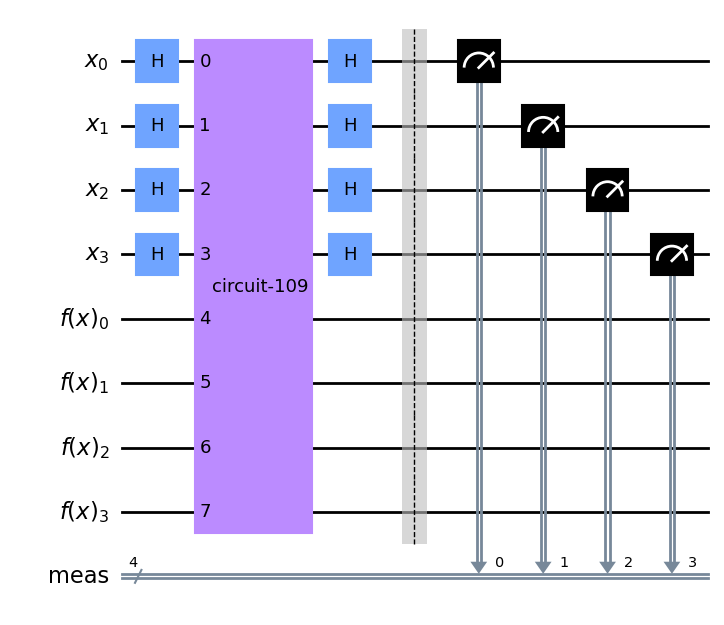

In [17]:
f_outputs = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

oracle = tQ.binary_function(f_outputs)
simon_qc = simon_circuit(oracle)
simon_qc.draw('mpl')

**Comprobación:**

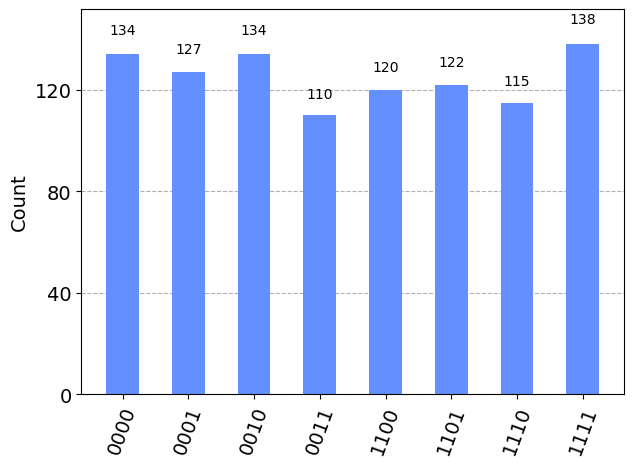

In [22]:
nshots = 1000

dist = Sampler().run(simon_qc,shots=nshots).result().quasi_dists[0]
counts_simon = tQ.dist2counts(dist,n,nshots)

from qiskit.visualization import plot_histogram
plot_histogram(counts_simon)

Ahora viene el postprocesado, necesario para extraer $s$

In [55]:
def extract_period(counts):
    'extraemos la longitud de las cuentas y que será igual a la de la incógnita s'
    n = len(list(counts)[0]) 

    'generamos todas las posibles periodicidades s'
    s_list = [format(i, 'b').zfill(n) for i in range(1, 2**n)]
#    s_list = [format(i, '0'+str(n)+'b') for i in range(1, 2**n)]  # otra manera de hacer lo mismo
#    print(s_list)

    'ahora evaluamos, para cada s,  s.y_i = 0 con todos los y_i encontrados'
    for s_str in s_list:
        s = [int(_) for _ in list(s_str)]
#        print(' s=',s)

        'solo necesitamos n valores de x independientes'
        prod_sxi = [sum([s[j]*int(xi[j]) for j in range(len(s))])%2 for xi in list(counts)[:]]

        'la suma será = 0 si y sólo si todos los s.x_i = 0 lo son también' 
        sum_sx = sum(prod_sxi)
        print('(Sum_i (s.x_i)%2))=', sum_sx, ' para s=', s_str)
        if  sum_sx==0:
            return s_str
 

Ejecutamos la parte clásica que sólo involucra ${\cal O}(n^2)$ operaciones

In [56]:
s_sol = extract_period(counts_simon)
print('la periodicidad buscada es =', s_sol)

(Sum_i (s.x_i)%2))= 4  para s= 0001
(Sum_i (s.x_i)%2))= 4  para s= 0010
(Sum_i (s.x_i)%2))= 4  para s= 0011
(Sum_i (s.x_i)%2))= 4  para s= 0100
(Sum_i (s.x_i)%2))= 4  para s= 0101
(Sum_i (s.x_i)%2))= 4  para s= 0110
(Sum_i (s.x_i)%2))= 4  para s= 0111
(Sum_i (s.x_i)%2))= 4  para s= 1000
(Sum_i (s.x_i)%2))= 4  para s= 1001
(Sum_i (s.x_i)%2))= 4  para s= 1010
(Sum_i (s.x_i)%2))= 4  para s= 1011
(Sum_i (s.x_i)%2))= 0  para s= 1100
la periodicidad buscada es = 1100


Ahora podemos repetir con otras funciones binarias doblemente valuadas. 

::::::{admonition} Ejercicio
:class: tip

    
Construye  una función que toma como argumento una cadena de bits <i>s</i>, y devuelve una tabla de verdad asociada a una función binaria $f:\{0,1\}^n\to\{0,1\}^n$ con exactamente la <i></i>periodicidad binaria</i> $s$. Utiliza el algoritmo de Simon para recuperar dicha periodicidad. 
::::::


In [58]:
def simon_oracle(s):   
    'autor Sergio Barrera'  

    def suma_mod2(a, b):    
        suma = ''
        for i in range(len(a)):
            suma += str((int(a[i]) + int(b[i])) % 2)
        return suma

    n = len(s) 
    inputs  = [format(i, 'b').zfill(n) for i in range(2**n)]
    aux = []
    f_outputs = []    
    for inp in inputs:
        if inp in [suma_mod2(a, s) for a in aux]:
            old = [a for a in aux if suma_mod2(a, s) == inp][0]
            f_outputs.append(old)
        else:
            f_outputs.append(inp)
            aux.append(inp)
    print(f_outputs)
    return tQ.binary_function(f_outputs)

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '0010', '0011', '0000', '0001', '0110', '0111', '0100', '0101']


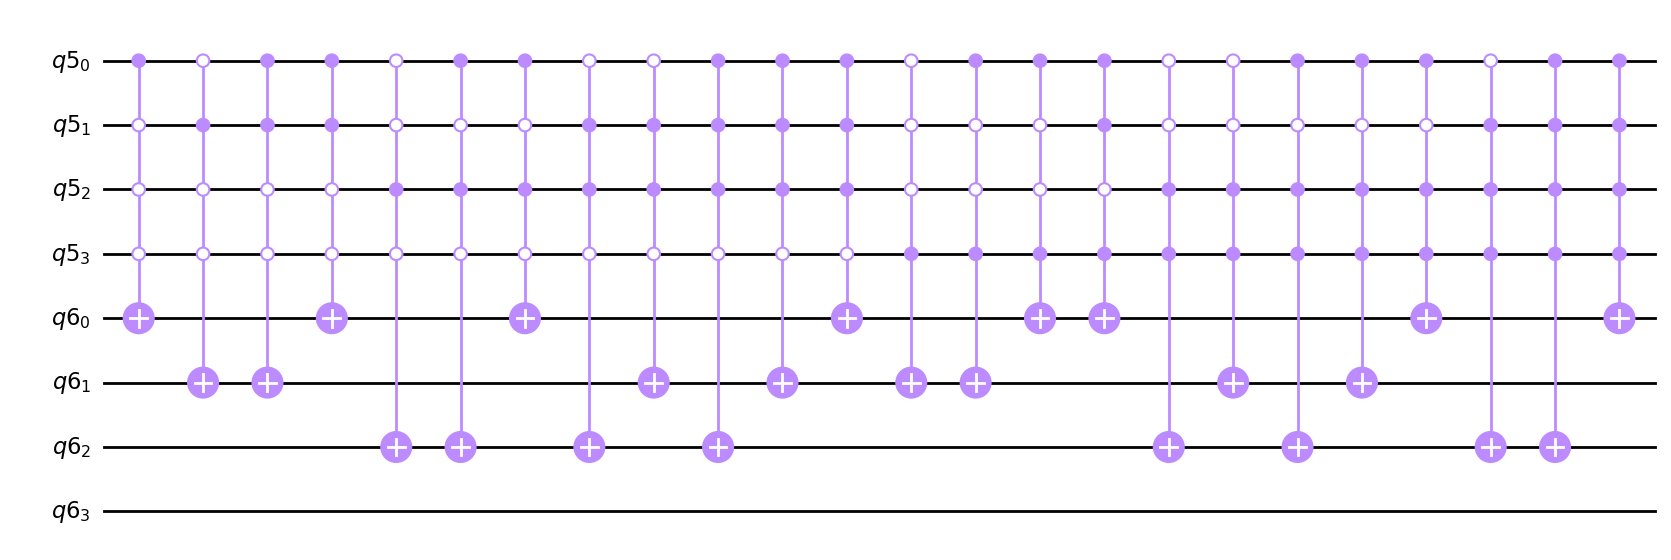

In [59]:
simon_oracle('1010').draw('mpl')